In [68]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load
City_data_to_load = "data/city_data.csv"
Ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_df = pd.read_csv(City_data_to_load)
Ride_df = pd.read_csv(Ride_data_to_load)

# Combine the data into a single dataset
Combined_df = pd.merge(City_df, Ride_df, on = "city", how = "outer")

# Display the data table for preview
Combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [69]:
# Calculate total number of rides, average fare
Total_rides = Combined_df.groupby(["city","type","driver_count"])["ride_id"].count()
Average_fare = Combined_df.groupby(["city","type","driver_count"])["fare"].mean()

# Create and display a new dataframe
Bubble = pd.DataFrame({"Average fare":Average_fare,"Total rides":Total_rides}).reset_index()
Bubble.head()

,city,type,driver_count,Average fare,Total rides
0,Amandaburgh,Urban,12,24.641667,18
1,Barajasview,Urban,26,25.332273,22
2,Barronchester,Suburban,11,36.422500,16
3,Bethanyland,Suburban,22,32.956111,18
4,Bradshawfurt,Rural,7,40.064000,10


## Bubble Plot of Ride Sharing Data

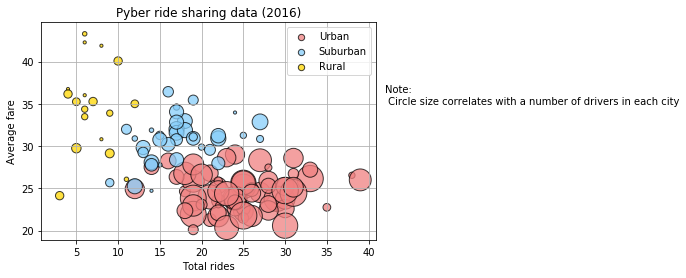

In [70]:
# Obtain the x and y coordinates for each of the three city types, build the scatter plots for each city type
# And then add additional graph properties
fig, axes = plt.subplots(nrows=1, ncols=1)

Bubble[Bubble["type"] == "Urban"].plot.scatter(ax = axes, x = "Total rides", y = "Average fare", s = Bubble[Bubble["type"] == "Urban"]["driver_count"]*10, alpha = .75, c = "lightcoral" , edgecolor = "black", label = "Urban")
Bubble[Bubble["type"] == "Suburban"].plot.scatter(ax = axes, x = "Total rides", y = "Average fare", s = Bubble[Bubble["type"] == "Suburban"]["driver_count"]*10, alpha = .75, c = "lightskyblue", edgecolor = "black", label = "Suburban")
Bubble[Bubble["type"] == "Rural"].plot.scatter(ax = axes, x = "Total rides", y = "Average fare", s = Bubble[Bubble["type"] == "Rural"]["driver_count"]*10, alpha = .75, c = "gold", edgecolor = "black", label = "Rural")

lgnd = plt.legend()
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]
plt.grid()

# Incorporate a text label regarding circle size, add a table title
plt.text(42,35,"Note:\n Circle size correlates with a number of drivers in each city", fontsize = 10)

plt.title("Pyber ride sharing data (2016)")

# Save a figure and show plot
plt.savefig("Chart_Bubble")
plt.show()

## Total Fares by City Type

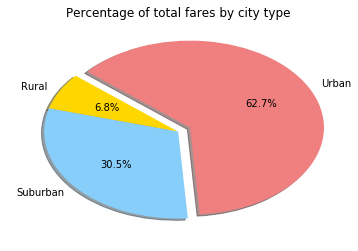

In [71]:
# Calculate total fares and percentage by city type
Total_fares_by_type = Combined_df.groupby("type")["fare"].sum()
Total_fares_by_type = Total_fares_by_type.reset_index()

# Build pie chart and add a chart title
plt.pie(Total_fares_by_type.loc[:,"fare"], explode = [0,0,.1], labels = Total_fares_by_type.loc[:,"type"], colors = ["gold", "lightskyblue", "lightcoral"], autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.title("Percentage of total fares by city type")

#Save figure and show plot
plt.savefig("Pie_Fairs")
plt.show()

## Total Rides by City Type

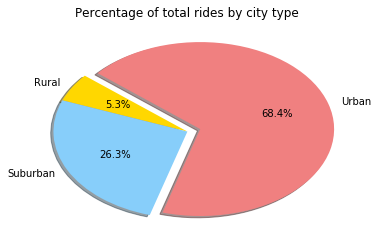

In [72]:
# Calculate total rides and percentage by city type
Total_rides_by_type = Combined_df.groupby("type")["ride_id"].count()
Total_rides_by_type = Total_rides_by_type.reset_index()

# Build a pie chart
plt.pie(Total_rides_by_type.loc[:,"ride_id"], explode = [0,0,.1], labels = Total_rides_by_type.loc[:,"type"], colors = ["gold", "lightskyblue", "lightcoral"], autopct="%1.1f%%", shadow = True, startangle = 140)
plt.title("Percentage of total rides by city type")

# Save a figure and show a plot
plt.savefig("Pie_Rides")
plt.show()

## Total Drivers by City Type

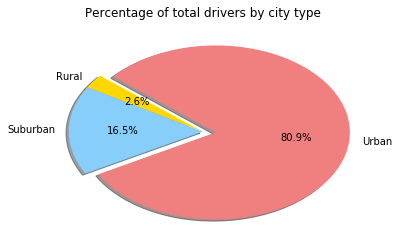

In [73]:
# Calculate total drivers and percentage by city type
Total_drivers_by_type = Combined_df.drop_duplicates(["city"]).groupby("type")["driver_count"].sum()
Total_drivers_by_type = Total_drivers_by_type.reset_index()

# Build pie chart
plt.pie(Total_drivers_by_type.loc[:,"driver_count"], explode = [0,0,.1], labels = Total_drivers_by_type.loc[:,"type"], colors = ["gold","lightskyblue","lightcoral"], autopct="%1.1f%%", shadow = True, startangle = 140)
plt.title("Percentage of total drivers by city type")

#Save Figure and show plot
plt.savefig("Pie_Drivers")
plt.show()